已连接到 multimodal-rag1-env (Python 3.10.17)

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

import nltk
nltk.data.path = ["/home/amax/nltk_data"]

from unstructured.partition.pdf import partition_pdf

output_path = '/home/amax/data3/yzd/multimodal-rag/'
file_path = output_path + 'attention.pdf'

import fitz  # PyMuPDF
from unstructured.partition.pdf import partition_pdf

# 处理PDF并获取元素（确保启用坐标提取）
elements = partition_pdf(
    file_path,
    strategy="hi_res",
    infer_table_structure=True,
    include_page_breaks=True,  # 确保坐标信息包含在metadata中
    coordinates_format="xyxy" 
)

doc = fitz.open(file_path)

scale_x = 612 / 1700 
scale_y = 792 / 2200

for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    elements_in_page = [e for e in elements if e.metadata.page_number == page_num + 1]
    
    for elem in elements_in_page:
        coord = elem.metadata.coordinates
        
        if not hasattr(coord, 'points'):
            continue
            
        try:
            points = [
                (float(x), float(y)) 
                for point in coord.points 
                for x, y in [point]  # 安全解包子元组
            ]     
            x_coords = [p[0] for p in points]
            y_coords = [p[1] for p in points]
            x0, y0 = min(x_coords)*scale_x, min(y_coords)*scale_y
            x1, y1 = max(x_coords)*scale_x, max(y_coords)*scale_y
            rect = fitz.Rect(
                x0, 
                y0, 
                x1, 
                y1
            )
            page.draw_rect(rect, color=(1, 0, 0), width=2)

            # 标注文字：在框左上角
            text_position = fitz.Point(x0, y0 - 5)  # 稍微往上提一点避免重叠
            page.insert_text(text_position,
                            elem.category,  # 插入元素的类型名
                            fontsize=6, color=(0, 0, 1))  # 蓝色字体，小号字
            
        except Exception as e:
            print(f"绘制错误 @ 元素 {elem.id}: {str(e)}")
            print(f"原始坐标数据: {coord.points}")

doc.save("annotated.pdf")

/home/amax/anaconda3/envs/multimodal-rag1-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

import nltk
nltk.data.path = ["/home/amax/nltk_data"]

from unstructured.partition.pdf import partition_pdf

output_path = '/home/amax/data3/yzd/multimodal-rag/'
file_path = output_path + 'attention.pdf'

import fitz  # PyMuPDF
from unstructured.partition.pdf import partition_pdf

# 处理PDF并获取元素（确保启用坐标提取）
elements = partition_pdf(
    file_path,
    strategy="hi_res",
    infer_table_structure=True,
    # include_page_breaks=True,  # 确保坐标信息包含在metadata中
    coordinates_format="xyxy" 
)

doc = fitz.open(file_path)

scale_x = 612 / 1700 
scale_y = 792 / 2200

for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    elements_in_page = [e for e in elements if e.metadata.page_number == page_num + 1]
    
    for elem in elements_in_page:
        coord = elem.metadata.coordinates
        
        if not hasattr(coord, 'points'):
            continue
            
        try:
            points = [
                (float(x), float(y)) 
                for point in coord.points 
                for x, y in [point]  # 安全解包子元组
            ]     
            x_coords = [p[0] for p in points]
            y_coords = [p[1] for p in points]
            x0, y0 = min(x_coords)*scale_x, min(y_coords)*scale_y
            x1, y1 = max(x_coords)*scale_x, max(y_coords)*scale_y
            rect = fitz.Rect(
                x0, 
                y0, 
                x1, 
                y1
            )
            page.draw_rect(rect, color=(1, 0, 0), width=2)

            # 标注文字：在框左上角
            text_position = fitz.Point(x0, y0 - 5)  # 稍微往上提一点避免重叠
            page.insert_text(text_position,
                            elem.category,  # 插入元素的类型名
                            fontsize=6, color=(0, 0, 1))  # 蓝色字体，小号字
            
        except Exception as e:
            print(f"绘制错误 @ 元素 {elem.id}: {str(e)}")
            print(f"原始坐标数据: {coord.points}")

doc.save("annotated.pdf")

In [ ]:
import os
from dotenv import load_dotenv

load_dotenv()

import nltk
nltk.data.path = ["/home/amax/nltk_data"]

from unstructured.partition.pdf import partition_pdf

output_path = '/home/amax/data3/yzd/multimodal-rag/'
file_path = output_path + 'attention.pdf'

import fitz  # PyMuPDF
from unstructured.partition.pdf import partition_pdf

# 处理PDF并获取元素（确保启用坐标提取）
elements = partition_pdf(
    file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_image_block_types=["Image"],   # Add 'Table' to list to extract image of tables
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage
    # include_page_breaks=True,  # 确保坐标信息包含在metadata中
    coordinates_format="xyxy" 
)

doc = fitz.open(file_path)

scale_x = 612 / 1700 
scale_y = 792 / 2200

for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    elements_in_page = [e for e in elements if e.metadata.page_number == page_num + 1]
    
    for elem in elements_in_page:
        coord = elem.metadata.coordinates
        
        if not hasattr(coord, 'points'):
            continue
            
        try:
            points = [
                (float(x), float(y)) 
                for point in coord.points 
                for x, y in [point]  # 安全解包子元组
            ]     
            x_coords = [p[0] for p in points]
            y_coords = [p[1] for p in points]
            x0, y0 = min(x_coords)*scale_x, min(y_coords)*scale_y
            x1, y1 = max(x_coords)*scale_x, max(y_coords)*scale_y
            rect = fitz.Rect(
                x0, 
                y0, 
                x1, 
                y1
            )
            page.draw_rect(rect, color=(1, 0, 0), width=2)

            # 标注文字：在框左上角
            text_position = fitz.Point(x0, y0 - 5)  # 稍微往上提一点避免重叠
            page.insert_text(text_position,
                            elem.category,  # 插入元素的类型名
                            fontsize=6, color=(0, 0, 1))  # 蓝色字体，小号字
            
        except Exception as e:
            print(f"绘制错误 @ 元素 {elem.id}: {str(e)}")
            print(f"原始坐标数据: {coord.points}")

doc.save("annotated.pdf")

已连接到 multimodal-rag1-env (Python 3.10.17)

/home/amax/anaconda3/envs/multimodal-rag1-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


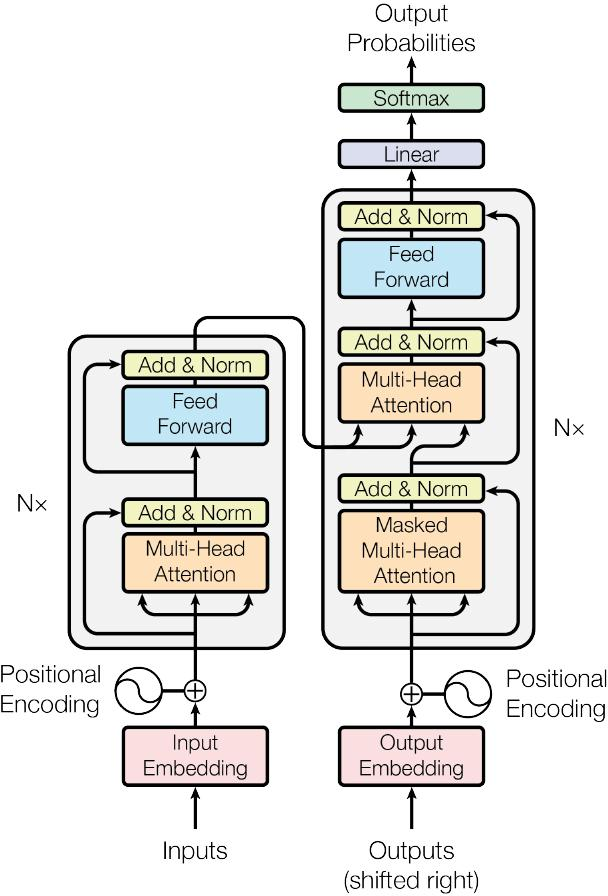

<ipython-input-1-5436ef319624>:197: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())


The attention mechanism is a method that maps a query and a set of key-value pairs to an output, where these components are represented as vectors. The output is computed as a weighted sum of the values, with weights determined by a compatibility function between the query and each corresponding key. Specifically, the scaled dot-product attention calculates this by taking the dot products of the query with the keys, scaling these by the dimension of the keys, and applying a softmax function to obtain the weights. These weights are then used to compute the output as a weighted sum of the values. 

In summary, the attention mechanism allows the model to selectively focus on different parts of the input sequence when producing an output, thereby enhancing the handling of important features in the data.
Response: Multi-head attention is a mechanism in the Transformer model that allows the model to jointly attend to information from different representation subspaces at different positions.

'## References\n\n- [LangChain Inspiration](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)\n- [Multivector Storage](https://python.langchain.com/docs/how_to/multi_vector/)\n'

In [ ]:
  # -*- coding: utf-8 -*-
import os
from dotenv import load_dotenv

load_dotenv()

import nltk
nltk.data.path = ["/home/amax/nltk_data"]

from unstructured.partition.pdf import partition_pdf

output_path = '/home/amax/data3/yzd/multimodal-rag/'
file_path = output_path + 'attention.pdf'

elements = partition_pdf(
    filename=file_path,
    strategy="hi_res",
    infer_table_structure=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=True
)

text_chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,            # extract tables
    strategy="hi_res",                     # mandatory to infer tables

    extract_image_block_types=["Image", "Table"],
 
    # image_output_dir_path=output_path,   # if None, images and tables will saved in base64

    extract_image_block_to_payload=True,   # if true, will extract base64 for API usage

    chunking_strategy="by_title",          # or 'basic'
    max_characters=10000,                  # defaults to 500
    combine_text_under_n_chars=2000,       # defaults to 0
    new_after_n_chars=6000,

    # extract_images_in_pdf=True,          # deprecated
)

chunks = text_chunks + [e for e in elements if e.category in ['Table', 'Image']]

# # We get 2 types of elements from the partition_pdf function
# set([str(type(el)) for el in chunks])

# # Each CompositeElement containes a bunch of related elements.
# # This makes it easy to use these elements together in a RAG pipeline.

# chunks[3].metadata.orig_elements

# # This is what an extracted image looks like.
# # It contains the base64 representation only because we set the param extract_image_block_to_payload=True

# elements = chunks[3].metadata.orig_elements
# chunk_images = [el for el in elements if 'Image' in str(type(el))]
# chunk_images[0].to_dict()

"""### Separate extracted elements into tables, text, and images"""

# separate tables from texts
tables = []
texts = []
images = []

for chunk in chunks:
    if "Table" in str(type(chunk)):
        tables.append(chunk)

    if "CompositeElement" in str(type((chunk))):
        texts.append(chunk)

    if "Image" in str(type((chunk))):
        images.append(chunk.metadata.image_base64)

# # Get the images from the CompositeElement objects
# def get_images_base64(chunks):
#     images_b64 = []
#     for chunk in chunks:
#         if "CompositeElement" in str(type(chunk)):
#             chunk_els = chunk.metadata.orig_elements
#             for el in chunk_els:
#                 if "Image" in str(type(el)):
#                     images_b64.append(el.metadata.image_base64)
#     return images_b64

# images = get_images_base64(chunks)

"""#### Check what the images look like"""

import base64
from IPython.display import Image, display

def display_base64_image(base64_code):
    # Decode the base64 string to binary
    image_data = base64.b64decode(base64_code)
    # Display the image
    display(Image(data=image_data))

display_base64_image(images[0])

"""## Summarize the data

Create a summary of each element extracted from the PDF. This summary will be vectorized and used in the retrieval process.

### Text and Table summaries

We don't need a multimodal model to generate the summaries of the tables and the text. I will use open source models available on Groq.
"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install -Uq langchain-groq

# from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

os.environ["OPENAI_API_KEY"] = "sk-Q9oWfNAtDAm3mQLnvjRD0F3V0kBfgo3aVHVZK00RBbP9Swk8"
os.environ["OPENAI_API_BASE"] = "https://api.openai-proxy.org/v1"

# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

# Summary chain
# model = ChatGroq(temperature=0.5, model="llama-3.1-8b-instant")
summarize_chain = {"element": lambda x: x} | prompt | ChatOpenAI(model="gpt-4") | StrOutputParser()

# Summarize text
text_summaries = summarize_chain.batch(texts, {"max_concurrency": 3})

# Summarize tables
tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {"max_concurrency": 3})

# text_summaries

"""### Image summaries

We will use gpt-4o-mini to produce the image summaries.
"""

# Commented out IPython magic to ensure Python compatibility.
# %pip install -Uq langchain_openai

prompt_template = """Describe the image in detail. For context,
                  the image is part of a research paper explaining the transformers
                  architecture. Be specific about graphs, such as bar plots."""
messages = [
    (
        "user",
        [
            {"type": "text", "text": prompt_template},
            {
                "type": "image_url",
                "image_url": {"url": "data:image/jpeg;base64,{image}"},
            },
        ],
    )
]

prompt = ChatPromptTemplate.from_messages(messages)

chain = prompt | ChatOpenAI(model="gpt-4o-mini") | StrOutputParser()


image_summaries = chain.batch(images)

# image_summaries

# print(image_summaries[1])

"""## Load data and summaries to vectorstore

### Create the vectorstore
"""

import uuid
from langchain.storage import InMemoryStore
from langchain.schema.document import Document
from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

# The vectorstore to use to index the child chunks
vectorstore = Chroma(collection_name="multi_modal_rag", embedding_function=OpenAIEmbeddings())

# The storage layer for the parent documents
store = InMemoryStore()
id_key = "doc_id"

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key,
)

"""### Load the summaries and link the to the original data"""

# Add texts
doc_ids = [str(uuid.uuid4()) for _ in texts]
summary_texts = [
    Document(page_content=summary, metadata={id_key: doc_ids[i]}) for i, summary in enumerate(text_summaries)
]
retriever.vectorstore.add_documents(summary_texts)
retriever.docstore.mset(list(zip(doc_ids, texts)))

# Add tables
table_ids = [str(uuid.uuid4()) for _ in tables]
summary_tables = [
    Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
]
retriever.vectorstore.add_documents(summary_tables)
retriever.docstore.mset(list(zip(table_ids, tables)))

# Add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_img = [
    Document(page_content=summary, metadata={id_key: img_ids[i]}) for i, summary in enumerate(image_summaries)
]
retriever.vectorstore.add_documents(summary_img)
retriever.docstore.mset(list(zip(img_ids, images)))

"""### Check retrieval"""

# # Retrieve
# docs = retriever.invoke(
#     "who are the authors of the paper?"
# )

# for doc in docs:
#     print(str(doc) + "\n\n" + "-" * 80)

"""## RAG pipeline"""

from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_openai import ChatOpenAI
from base64 import b64decode


def parse_docs(docs):
    """Split base64-encoded images and texts"""
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception as e:
            text.append(doc)
    return {"images": b64, "texts": text}


def build_prompt(kwargs):

    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text

    # construct prompt with context (including images)
    prompt_template = f"""
    Answer the question based only on the following context, which can include text, tables, and the below image.
    Context: {context_text}
    Question: {user_question}
    """

    prompt_content = [{"type": "text", "text": prompt_template}]

    if len(docs_by_type["images"]) > 0:
        for image in docs_by_type["images"]:
            prompt_content.append(
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{image}"},
                }
            )

    return ChatPromptTemplate.from_messages(
        [
            HumanMessage(content=prompt_content),
        ]
    )


chain = (
    {
        "context": retriever | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatOpenAI(model="gpt-4o-mini")
    | StrOutputParser()
)

chain_with_sources = {
    "context": retriever | RunnableLambda(parse_docs),
    "question": RunnablePassthrough(),
} | RunnablePassthrough().assign(
    response=(
        RunnableLambda(build_prompt)
        | ChatOpenAI(model="gpt-4o-mini")
        | StrOutputParser()
    )
)

response = chain.invoke(
    "What is the attention mechanism?"
)

print(response)

response = chain_with_sources.invoke(
    "What is multihead?"
)

print("Response:", response['response'])

print("\n\nContext:")
for text in response['context']['texts']:
    print(text.text)
    print("Page number: ", text.metadata.page_number)
    print("\n" + "-"*50 + "\n")
for image in response['context']['images']:
    display_base64_image(image)

"""## References

- [LangChain Inspiration](https://github.com/langchain-ai/langchain/blob/master/cookbook/Semi_structured_and_multi_modal_RAG.ipynb?ref=blog.langchain.dev)
- [Multivector Storage](https://python.langchain.com/docs/how_to/multi_vector/)
"""